# Challenge Part 2 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display definitions
pd.set_option('display.max_rows', 500000)
pd.set_option('display.max_columns', 1000000)
pd.set_option('display.width', 100000)

In [2]:
ds2 = pd.read_csv('topic_prediction_per_journalist.csv')
ds2.head()

,author,content,prediction_SGD,Topics
0,Carl Hulse,WASHINGTON — Congressional Republicans have...,0,Business
1,Benjamin Mueller and Al Baker,"After the bullet shells get counted, the blood...",2,Politics
2,Margalit Fox,"When Walt Disney’s “Bambi” opened in 1942, cri...",1,Entertainment
3,William McDonald,"Death may be the great equalizer, but it isn’t...",1,Entertainment
4,Choe Sang-Hun,"SEOUL, South Korea — North Korea’s leader, ...",0,Business


In [3]:
# Cheking number of rows of dataset
ds2.shape

(50000, 4)

In [4]:
#Checking for amount of missing values
ds2.isnull().values.sum()

6306

In [5]:
# Checking types of each column
ds2.dtypes

author            object
content           object
prediction_SGD     int64
Topics            object
dtype: object

In [6]:
# As the NaN's are a small fraction of the whole dataset, I will remove them
ds2.dropna(how='any', inplace=True)

In [16]:
# Creating a unique columns ID for each journalist for later correlation
ds2['id'] = ds2.groupby(['author']).ngroup()
ds2.head()

,author,content,prediction_SGD,Topics,id
0,Carl Hulse,WASHINGTON — Congressional Republicans have...,0,Business,610
1,Benjamin Mueller and Al Baker,"After the bullet shells get counted, the blood...",2,Politics,473
2,Margalit Fox,"When Walt Disney’s “Bambi” opened in 1942, cri...",1,Entertainment,2177
3,William McDonald,"Death may be the great equalizer, but it isn’t...",1,Entertainment,3570
4,Choe Sang-Hun,"SEOUL, South Korea — North Korea’s leader, ...",0,Business,678


# Journalist input function that returns their topics


In [8]:
def search_topic(name):
    return ds2.loc[(ds2['author'] == name), ['author','content','Topics', 'id']]

In [9]:
search_topic(input('Enter a journalist name: '))

Enter a journalist name: Pam Key


,author,content,Topics,id
7845,Pam Key,"Sunday on CBS’s “Face The Nation,” while discu...",Entertainment,2764
7846,Pam Key,"Thursday on KNBC 4’s “News at 11 pm,” Rep. Max...",Business,2764
7854,Pam Key,"Sunday on CNN’s “State of the Union,” Sen. Joh...",Entertainment,2764
7969,Pam Key,"On Thursday, MSNBC host Katy Tur seemed to con...",Politics,2764
7977,Pam Key,"Friday on MSNBC, Senate Minority Leader Chuck ...",Politics,2764
8010,Pam Key,"Sunday on Fox News Channel’s “Fox Friends,” w...",Entertainment,2764
8051,Pam Key,"Wednesday on ABC’s ‘The View,” MSNBC host Rach...",Entertainment,2764
8086,Pam Key,.@nikkihaley: ”The president is the CEO of the...,Business,2764
8096,Pam Key,"Thursday on CNN’s “Situation Room,” Sen. Rober...",Business,2764
8114,Pam Key,"Thursday at the White House press briefing, pr...",Entertainment,2764


# Preparing dataset for correlation

In [17]:
# Counting how many different journalists we have in the data
ds2['author'].value_counts().count()

3603

In [18]:
# Creating a function that returns the journalist name through id search (not necessary, but could be useful)
def search_id(number):
    return ds2.loc[ds2['id'] == number]

search_id(2764)

,author,content,prediction_SGD,Topics,id
7845,Pam Key,"Sunday on CBS’s “Face The Nation,” while discu...",1,Entertainment,2764
7846,Pam Key,"Thursday on KNBC 4’s “News at 11 pm,” Rep. Max...",0,Business,2764
7854,Pam Key,"Sunday on CNN’s “State of the Union,” Sen. Joh...",1,Entertainment,2764
7969,Pam Key,"On Thursday, MSNBC host Katy Tur seemed to con...",2,Politics,2764
7977,Pam Key,"Friday on MSNBC, Senate Minority Leader Chuck ...",2,Politics,2764
8010,Pam Key,"Sunday on Fox News Channel’s “Fox Friends,” w...",1,Entertainment,2764
8051,Pam Key,"Wednesday on ABC’s ‘The View,” MSNBC host Rach...",1,Entertainment,2764
8086,Pam Key,.@nikkihaley: ”The president is the CEO of the...,0,Business,2764
8096,Pam Key,"Thursday on CNN’s “Situation Room,” Sen. Rober...",0,Business,2764
8114,Pam Key,"Thursday at the White House press briefing, pr...",1,Entertainment,2764


In [19]:
# Creating a new dataframe with topics per column
ds3 = pd.get_dummies(ds2, columns=['Topics'])

In [20]:
#Dropping id columns which will not be needed
ds3.drop(columns=['id'], inplace=True)

In [22]:
# Renaming columns to have a better fit of numbers and words in heatmap correlation
ds3 = ds3.rename(columns={'Topics_Business': 'Business',
                          'Topics_Sports': 'Sports',
                          'Topics_Tech': 'Tech',
                          'Topics_Politics': 'Politics',
                          'Topics_Entertainment': 'Entertainment'
                         })
ds3.head()

,author,content,prediction_SGD,Business,Entertainment,Politics,Sports,Tech
0,Carl Hulse,WASHINGTON — Congressional Republicans have...,0,1,0,0,0,0
1,Benjamin Mueller and Al Baker,"After the bullet shells get counted, the blood...",2,0,0,1,0,0
2,Margalit Fox,"When Walt Disney’s “Bambi” opened in 1942, cri...",1,0,1,0,0,0
3,William McDonald,"Death may be the great equalizer, but it isn’t...",1,0,1,0,0,0
4,Choe Sang-Hun,"SEOUL, South Korea — North Korea’s leader, ...",0,1,0,0,0,0


In [23]:
def correlation(journalist):
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.heatmap(ds3.loc[(ds3['author'] == journalist)].corr(), 
                     annot = True, cmap = 'YlGnBu', center = 0, linewidths=1, ax=ax)
    plt.xticks(rotation=45,)
    plt.yticks(rotation=45)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    return ax

# Correlation Function of specific journalist and topic 

Enter the name of a journalist: Pam Key


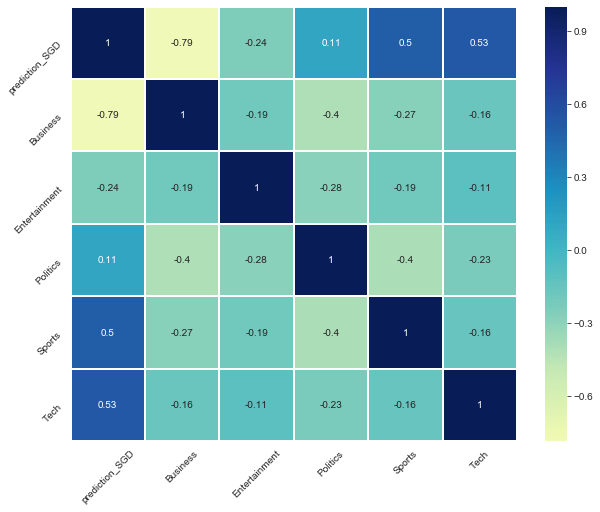

In [24]:
correlation(input('Enter the name of a journalist: '))